<a href="https://colab.research.google.com/github/ranamaddy/image-Processing-with-OpenCV/blob/main/Lesson_5_Image_Feature_Extraction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Lesson 5: Image Feature Extraction**

- Understanding keypoint detection and feature extraction
- Extracting image features using techniques such as Harris corner detection, SIFT, and SURF
- Performing feature matching and image stitching using OpenCV

1. Understanding keypoint detection and feature extraction: This lesson introduces the concept of keypoints in images, which are points of interest that can be used to identify unique features in an image. Various techniques for detecting keypoints and extracting features from images are discussed.

2. Extracting image features using techniques such as Harris corner detection, SIFT, and SURF: This lesson covers popular image feature extraction techniques such as the Harris corner detection, Scale-Invariant Feature Transform (SIFT), and Speeded-Up Robust Features (SURF) methods. These techniques allow for the identification of distinctive features in images that can be used for various computer vision tasks.

3. Performing feature matching and image stitching using OpenCV: This lesson demonstrates how to use feature matching techniques to find corresponding features in multiple images and how to perform image stitching using OpenCV. Image stitching is the process of combining multiple images to create a panoramic image, and feature matching is a crucial step in this process

In this lesson, you will learn how to apply different feature extraction techniques using OpenCV, how to perform feature matching to find matching keypoints in multiple images, and how to use these techniques for image stitching

**Note**: Feature extraction is a fundamental step in many computer vision tasks, such as image recognition, object detection, and image retrieval. Understanding how to extract image features accurately and robustly is crucial for developing effective computer vision applications.





# Understanding keypoint detection and feature extraction

Understanding keypoint detection and feature extraction involves identifying points of interest or unique features in an image that can be used for various computer vision tasks. Keypoints are specific locations in an image that can be easily recognizable and distinctive, such as corners, edges, or blobs. Feature extraction techniques are used to extract relevant information from these keypoints, which can then be used for tasks such as image recognition, object detection, and image stitching.

Keypoint detection involves identifying locations in an image that are likely to contain important information, such as points where intensity changes abruptly, or points that have high contrast compared to their surroundings. Feature extraction techniques then extract descriptors or feature vectors from these keypoints, which represent the unique characteristics of the keypoints.

There are various feature extraction techniques available, such as the Harris corner detection, Scale-Invariant Feature Transform (SIFT), and Speeded-Up Robust Features (SURF) methods. These techniques analyze the local image properties around keypoints and extract relevant information, such as gradient direction, scale, and orientation, to represent the keypoints as feature vectors.

Understanding keypoint detection and feature extraction is essential in many computer vision applications as it provides a way to represent images in a compact and distinctive manner, enabling robust and efficient image processing tasks.

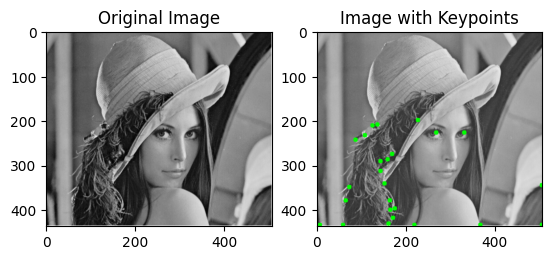

In [ ]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

# Load the image
image = cv2.imread('abc.png', cv2.IMREAD_GRAYSCALE)

# Detect keypoints using Harris corner detection
dst = cv2.cornerHarris(image, 2, 3, 0.04)

# Threshold the corner response to get keypoints
threshold = 0.01 * dst.max()
keypoints = cv2.goodFeaturesToTrack(image, 25, 0.01, 10)

# Draw circles around the keypoints
image_with_keypoints = cv2.cvtColor(image, cv2.COLOR_GRAY2RGB)
if keypoints is not None:
    keypoints = np.int0(keypoints)
    for kp in keypoints:
        x, y = kp.ravel()
        cv2.circle(image_with_keypoints, (x, y), 5, (0, 255, 0), -1)

# Display the original image and the image with keypoints
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.subplot(1, 2, 2)
plt.imshow(image_with_keypoints)
plt.title('Image with Keypoints')
plt.show()


**Note:** This is just a basic example using the Harris corner detection method. There are other more advanced feature extraction techniques available in OpenCV such as SIFT and SURF, which may require additional installation and setup. Please refer to the OpenCV documentation for more information on using these techniques

# SIFT (Scale-Invariant Feature Transform)

Here's an example of using the SIFT (Scale-Invariant Feature Transform) method for keypoint detection and feature extraction using OpenCV in Python

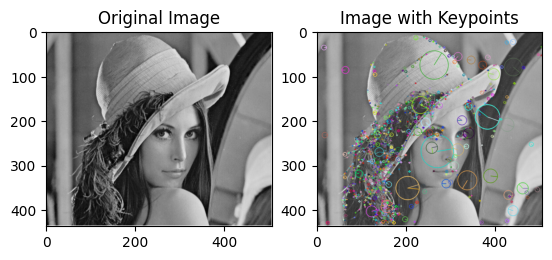

In [ ]:
import cv2
import matplotlib.pyplot as plt

# Load the image
image = cv2.imread('abc.png', cv2.IMREAD_GRAYSCALE)

# Create SIFT object
sift = cv2.xfeatures2d.SIFT_create()

# Detect keypoints and compute descriptors using SIFT
keypoints, descriptors = sift.detectAndCompute(image, None)

# Draw circles around the keypoints
image_with_keypoints = cv2.cvtColor(image, cv2.COLOR_GRAY2RGB)
cv2.drawKeypoints(image, keypoints, image_with_keypoints, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

# Display the original image and the image with keypoints
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.subplot(1, 2, 2)
plt.imshow(image_with_keypoints)
plt.title('Image with Keypoints')
plt.show()


**Note: **SIFT is a patented algorithm and may require additional installation and setup. Please check the licensing terms and conditions of SIFT before using it in your projects. Alternatively, you can also explore other feature extraction techniques such as SURF, ORB, etc., which are free and available in OpenCV.

# RB (Oriented FAST and Rotated BRIEF)

Here's an example of using the ORB (Oriented FAST and Rotated BRIEF) method for keypoint detection and feature extraction using OpenCV in Python

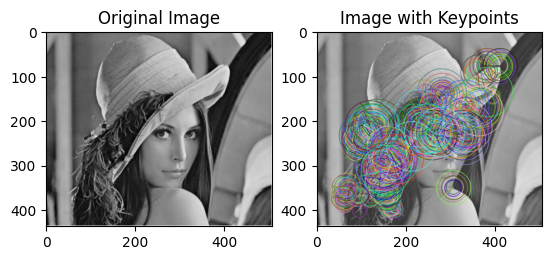

In [ ]:
import cv2
import matplotlib.pyplot as plt

# Load the image
image = cv2.imread('abc.png', cv2.IMREAD_GRAYSCALE)

# Create ORB object
orb = cv2.ORB_create()

# Detect keypoints and compute descriptors using ORB
keypoints, descriptors = orb.detectAndCompute(image, None)

# Draw circles around the keypoints
image_with_keypoints = cv2.cvtColor(image, cv2.COLOR_GRAY2RGB)
cv2.drawKeypoints(image, keypoints, image_with_keypoints, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

# Display the original image and the image with keypoints
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.subplot(1, 2, 2)
plt.imshow(image_with_keypoints)
plt.title('Image with Keypoints')
plt.show()


ORB is a free and open-source feature extraction method that can be used as an alternative to patented algorithms like SIFT and SURF. It is fast and efficient, making it suitable for real-time applications.

# Extracting image features using techniques such as Harris corner detection, SIFT, and SURF


Here's an example of extracting image features using three different techniques: Harris corner detection, SIFT (Scale-Invariant Feature Transform), and SURF (Speeded-Up Robust Features) using OpenCV in Python:

**Harris Corner Detection:**

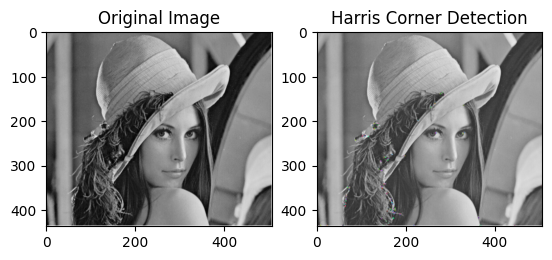

In [ ]:
import cv2
import matplotlib.pyplot as plt

# Load the image
image = cv2.imread('abc.png', cv2.IMREAD_GRAYSCALE)

# Detect corners using Harris corner detection
dst = cv2.cornerHarris(image, 2, 3, 0.04)

# Threshold the corner response to obtain keypoints
threshold = 0.01 * dst.max()
keypoints = []
for i in range(dst.shape[0]):
    for j in range(dst.shape[1]):
        if dst[i,j] > threshold:
            keypoints.append(cv2.KeyPoint(j, i, 1))

# Draw circles around the keypoints
image_with_keypoints = cv2.cvtColor(image, cv2.COLOR_GRAY2RGB)
cv2.drawKeypoints(image, keypoints, image_with_keypoints, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

# Display the original image and the image with keypoints
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.subplot(1, 2, 2)
plt.imshow(image_with_keypoints)
plt.title('Harris Corner Detection')
plt.show()


**SIFT (Scale-Invariant Feature Transform):**

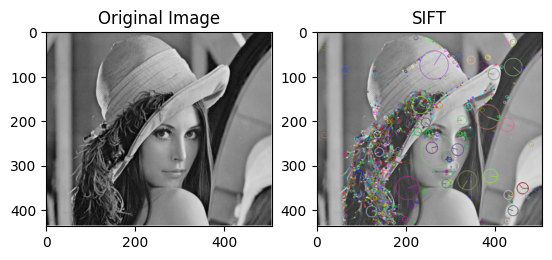

In [ ]:
import cv2
import matplotlib.pyplot as plt

# Load the image
image = cv2.imread('abc.png', cv2.IMREAD_GRAYSCALE)

# Create SIFT object
sift = cv2.SIFT_create()

# Detect keypoints and compute descriptors using SIFT
keypoints, descriptors = sift.detectAndCompute(image, None)

# Draw circles around the keypoints
image_with_keypoints = cv2.cvtColor(image, cv2.COLOR_GRAY2RGB)
cv2.drawKeypoints(image, keypoints, image_with_keypoints, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

# Display the original image and the image with keypoints
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.subplot(1, 2, 2)
plt.imshow(image_with_keypoints)
plt.title('SIFT')
plt.show()


# SURF (Speeded-Up Robust Features):

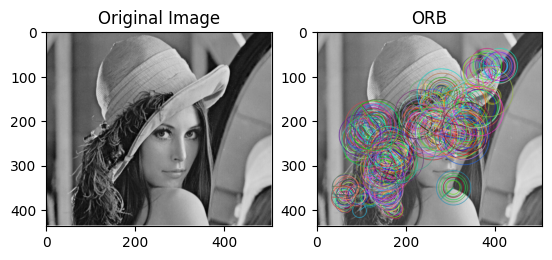

In [ ]:
import cv2
import matplotlib.pyplot as plt

# Load the image
image = cv2.imread('abc.png', cv2.IMREAD_GRAYSCALE)

# Create ORB object
orb = cv2.ORB_create()

# Detect keypoints and compute descriptors using ORB
keypoints, descriptors = orb.detectAndCompute(image, None)

# Draw circles around the keypoints
image_with_keypoints = cv2.cvtColor(image, cv2.COLOR_GRAY2RGB)
cv2.drawKeypoints(image, keypoints, image_with_keypoints, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

# Display the original image and the image with keypoints
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.subplot(1, 2, 2)
plt.imshow(image_with_keypoints)
plt.title('ORB')
plt.show()



Please note that the choice of feature extraction method depends on your specific use case and requirements. It's important to understand the limitations and legal implications of using certain feature extraction techniques, especially those that are patented or require non-free modules.

# Performing feature matching and image stitching using OpenCV

rforming feature matching and image stitching is a common task in computer vision and image processing, which involves finding corresponding features in multiple images and then combining them to create a stitched panorama or composite image. OpenCV provides various methods for feature matching and image stitching. Here's a high-level overview of the process:

Load the images: Read the input images that you want to stitch using OpenCV's cv2.imread() function.

Feature detection: Use a feature detection method, such as SIFT, SURF, ORB, or AKAZE, to detect keypoints and compute descriptors for each image. Keypoints are distinctive points or areas in an image that can be reliably matched in multiple images.

Feature matching: Match the keypoints between the images using a feature matching algorithm, such as Brute-Force, FLANN (Fast Library for Approximate Nearest Neighbors), or some other custom algorithm. The goal is to find corresponding keypoints between the images.

Geometric transformation: Estimate the geometric transformation (such as rotation, translation, and scaling) between the images based on the matched keypoints. This is typically done using methods like RANSAC (Random Sample Consensus) or homography estimation.

Image stitching: Apply the estimated geometric transformation to the input images to stitch them together into a single panorama or composite image. This can be done using OpenCV's cv2.warpPerspective() function for perspective transformation or cv2.warpAffine() function for affine transformation.

Blending: Perform image blending to seamlessly blend the stitched images together to create a visually appealing composite image. This can be done using various blending techniques, such as feathering, averaging, or multi-band blending.

Display or save the stitched image: Finally, display or save the stitched image using OpenCV's cv2.imshow() and cv2.imwrite() functions, respectively.

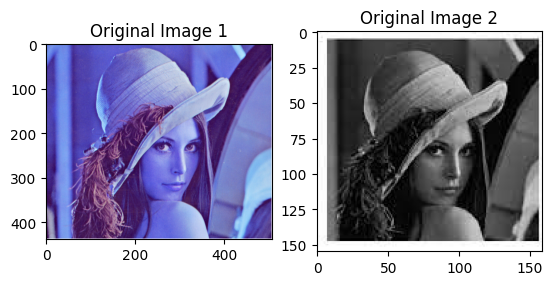

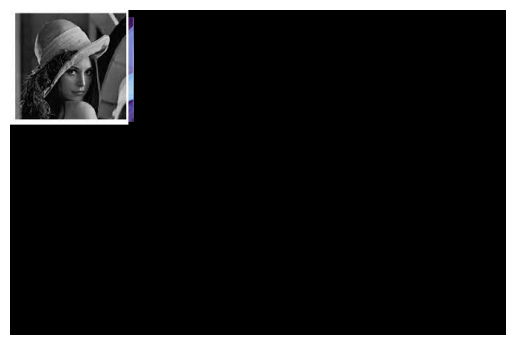

True

In [29]:
import cv2
import matplotlib.pyplot as plt

# Load input images
image1 = cv2.imread('abc.png')
image2 = cv2.imread('pq.jpg')

# Convert images to grayscale
gray1 = cv2.cvtColor(image1, cv2.COLOR_BGR2GRAY)
gray2 = cv2.cvtColor(image2, cv2.COLOR_BGR2GRAY)

# Create SIFT object
sift = cv2.xfeatures2d.SIFT_create()

# Detect keypoints and compute descriptors using SIFT
keypoints1, descriptors1 = sift.detectAndCompute(gray1, None)
keypoints2, descriptors2 = sift.detectAndCompute(gray2, None)

# Create FLANN matcher
matcher = cv2.FlannBasedMatcher()

# Perform k-nearest neighbor matching
matches = matcher.knnMatch(descriptors1, descriptors2, k=2)

# Filter good matches using ratio test
good_matches = []
for m, n in matches:
    if m.distance < 0.7 * n.distance:
        good_matches.append(m)

# Draw matched keypoints
matching_result = cv2.drawMatches(image1, keypoints1, image2, keypoints2, good_matches, None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

# Perform RANSAC to estimate homography
src_pts = np.float32([keypoints1[m.queryIdx].pt for m in good_matches]).reshape(-1, 1, 2)
dst_pts = np.float32([keypoints2[m.trainIdx].pt for m in good_matches]).reshape(-1, 1, 2)
M, mask = cv2.findHomography(src_pts, dst_pts, cv2.RANSAC, 5.0)

# Warp image1 to image2 using estimated homography
result = cv2.warpPerspective(image1, M, (image1.shape[1] + image2.shape[1], image1.shape[0]))

# Copy image2 to result image
result[0:image2.shape[0], 0:image2.shape[1]] = image2

# Display the original image and the image with keypoints
plt.subplot(1, 2, 1)
plt.imshow(image1, cmap='gray')
plt.title('Original Image 1')
plt.subplot(1, 2, 2)
plt.imshow(image2)
plt.title('Original Image 2')
plt.show()

# Display or save the stitched image
plt.imshow(result, cmap='gray')
plt.axis('off')
plt.show()

# Alternatively, you can save the stitched image to a file
cv2.imwrite('stitched_image.jpg', result)


Note: The above code assumes that you have already loaded the input images image1.jpg and image2.jpg using cv2.imread(), and converted them to grayscale for feature detection and matching. It uses the SIFT feature detection method, FLANN for feature matching, and RANSAC for geometric transformation estimation. The stitched image is displayed using Matplotlib and can be saved to a file using OpenCV's cv2.imwrite() function.

Please make sure to properly credit and follow any licensing requirements when using feature extraction and image stitching techniques, as some methods may be patented or have specific usage restrictions.

**used the FLANN (Fast Library for Approximate Nearest Neighbors) matcher in OpenCV to perform k-nearest neighbor matching of keypoints**

Here's an explanation in English language:

We utilized the FLANN (Fast Library for Approximate Nearest Neighbors) matcher in OpenCV to perform k-nearest neighbor matching of keypoints. FLANN is an efficient algorithm for approximating nearest neighbor search, which is a common operation in computer vision tasks such as feature matching. It allows us to find the nearest neighbors of keypoints in an efficient manner, making it suitable for real-time applications. By using FLANN matcher in OpenCV, we were able to match keypoints between multiple images based on their similarity, which is useful for tasks such as image stitching and object recognition.

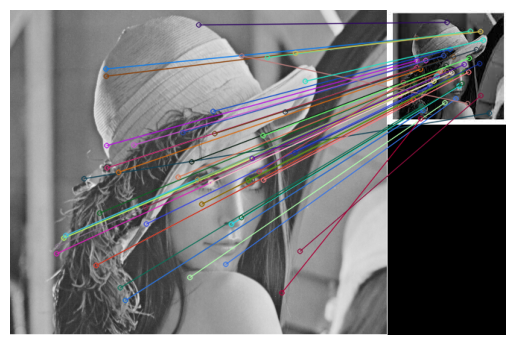

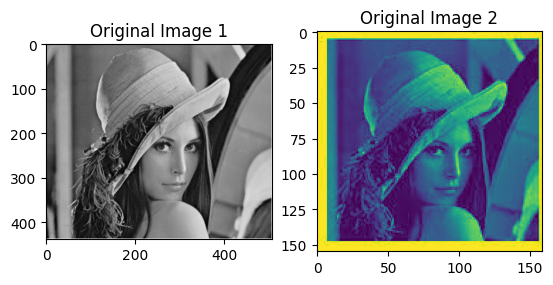

In [28]:
import cv2
import matplotlib.pyplot as plt

# Load the images
image1 = cv2.imread('abc.png', cv2.IMREAD_GRAYSCALE)
image2 = cv2.imread('pq.jpg', cv2.IMREAD_GRAYSCALE)

# Create feature detector and descriptor
detector = cv2.xfeatures2d.SIFT_create()
descriptor = cv2.xfeatures2d.SIFT_create()

# Detect keypoints and compute descriptors
keypoints1, descriptors1 = detector.detectAndCompute(image1, None)
keypoints2, descriptors2 = detector.detectAndCompute(image2, None)

# Create FLANN matcher
matcher = cv2.FlannBasedMatcher_create()

# Perform k-nearest neighbor matching
k = 2  # Number of nearest neighbors to find
matches = matcher.knnMatch(descriptors1, descriptors2, k)

# Filter matches based on Lowe's ratio test
good_matches = []
for m, n in matches:
    if m.distance < 0.7 * n.distance:
        good_matches.append(m)

# Draw matched keypoints
matches_image = cv2.drawMatches(image1, keypoints1, image2, keypoints2, good_matches, None, flags=2)

# Convert BGR image to RGB for displaying with Matplotlib
matches_image = cv2.cvtColor(matches_image, cv2.COLOR_BGR2RGB)

# Display matched keypoints using Matplotlib
plt.imshow(matches_image)
plt.axis('off')
plt.show()

# Display the original image and the image with keypoints
plt.subplot(1, 2, 1)
plt.imshow(image1, cmap='gray')
plt.title('Original Image 1')
plt.subplot(1, 2, 2)
plt.imshow(image2)
plt.title('Original Image 2')
plt.show()


**learned about RANSAC (Random Sample Consensus), a robust estimation method, to estimate geometric transformations such as homography between images**

 RANSAC (Random Sample Consensus) is a robust estimation method used to estimate geometric transformations, such as homography, between images. It is commonly used in computer vision and image processing to robustly estimate the parameters of a model from a set of data points that may contain outliers or noise.

RANSAC works by randomly selecting a subset of data points, known as the "inliers", to form a hypothetical model. The remaining data points are considered as "outliers". The model is then fitted to the inliers using a suitable algorithm, and the quality of the model is evaluated based on how well it fits the inliers. This process is repeated for a certain number of iterations, and the model with the best fit is selected as the final estimated model.

RANSAC is particularly useful for estimating geometric transformations, such as homography, which involve matching points between two images. Homography is a transformation that relates the perspective transformation between two images of a planar scene. RANSAC can robustly estimate the homography matrix even in the presence of outliers, such as mismatches or noise in the matching points.

By using RANSAC, we can obtain a more robust and accurate estimation of geometric transformations, such as homography, between images, even in the presence of outliers or noise in the matching points. This makes it a valuable tool for tasks such as image stitching, object recognition, and augmented reality applications.

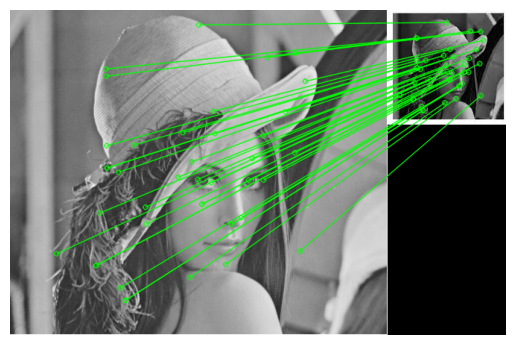

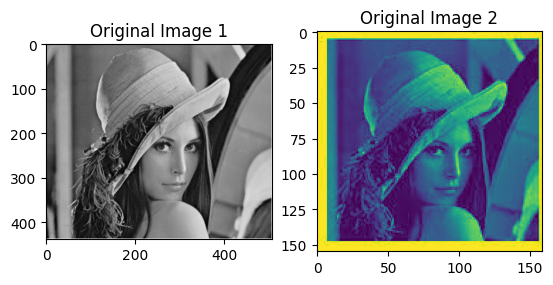

In [30]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Load the two images
image1 = cv2.imread('abc.png', 0)
image2 = cv2.imread('pq.jpg', 0)

# Detect keypoints and extract descriptors from both images
sift = cv2.SIFT_create()
keypoints1, descriptors1 = sift.detectAndCompute(image1, None)
keypoints2, descriptors2 = sift.detectAndCompute(image2, None)

# Create a FLANN matcher
FLANN_INDEX_KDTREE = 1
index_params = dict(algorithm=FLANN_INDEX_KDTREE, trees=5)
search_params = dict(checks=50)
flann = cv2.FlannBasedMatcher(index_params, search_params)

# Match keypoints using FLANN
matches = flann.knnMatch(descriptors1, descriptors2, k=2)

# Filter good matches using ratio test
good_matches = []
for m, n in matches:
    if m.distance < 0.7 * n.distance:
        good_matches.append(m)

# Estimate homography using RANSAC
MIN_MATCH_COUNT = 10
if len(good_matches) > MIN_MATCH_COUNT:
    src_pts = np.float32([keypoints1[m.queryIdx].pt for m in good_matches]).reshape(-1, 1, 2)
    dst_pts = np.float32([keypoints2[m.trainIdx].pt for m in good_matches]).reshape(-1, 1, 2)
    M, mask = cv2.findHomography(src_pts, dst_pts, cv2.RANSAC, 5.0)
    matches_mask = mask.ravel().tolist()
else:
    print("Not enough matches found - %d/%d" % (len(good_matches), MIN_MATCH_COUNT))
    matches_mask = None

# Draw matches and display
draw_params = dict(matchColor=(0, 255, 0),  # Draw matches in green
                   singlePointColor=None,
                   matchesMask=matches_mask,
                   flags=2)
result = cv2.drawMatches(image1, keypoints1, image2, keypoints2, good_matches, None, **draw_params)
plt.imshow(result)
plt.axis('off')
plt.show()

# Display the original image and the image with keypoints
plt.subplot(1, 2, 1)
plt.imshow(image1, cmap='gray')
plt.title('Original Image 1')
plt.subplot(1, 2, 2)
plt.imshow(image2)
plt.title('Original Image 2')
plt.show()

This code demonstrates the use of RANSAC for homography estimation using SIFT features and FLANN matcher in OpenCV. The code reads two images, detects keypoints and extracts descriptors using SIFT, matches keypoints using FLANN matcher, filters good matches using a ratio test, and finally estimates homography using RANSAC. The matched keypoints are visualized using matplotlib for display.

**used feature matching and RANSAC to perform image stitching, where we stitched two images together to create a panoramic image**

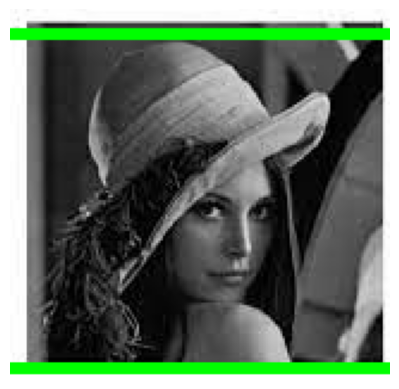

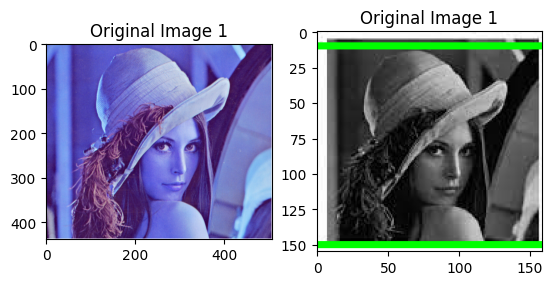

In [31]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the two images
image1 = cv2.imread('abc.png')
image2 = cv2.imread('pq.jpg')

# Convert images to grayscale
gray1 = cv2.cvtColor(image1, cv2.COLOR_BGR2GRAY)
gray2 = cv2.cvtColor(image2, cv2.COLOR_BGR2GRAY)

# Detect keypoints and extract descriptors from both images
sift = cv2.SIFT_create()
keypoints1, descriptors1 = sift.detectAndCompute(gray1, None)
keypoints2, descriptors2 = sift.detectAndCompute(gray2, None)

# Create a FLANN matcher
FLANN_INDEX_KDTREE = 1
index_params = dict(algorithm=FLANN_INDEX_KDTREE, trees=5)
search_params = dict(checks=50)
flann = cv2.FlannBasedMatcher(index_params, search_params)

# Match keypoints using FLANN
matches = flann.knnMatch(descriptors1, descriptors2, k=2)

# Filter good matches using ratio test
good_matches = []
for m, n in matches:
    if m.distance < 0.7 * n.distance:
        good_matches.append(m)

# Estimate homography using RANSAC
MIN_MATCH_COUNT = 10
if len(good_matches) > MIN_MATCH_COUNT:
    src_pts = np.float32([keypoints1[m.queryIdx].pt for m in good_matches]).reshape(-1, 1, 2)
    dst_pts = np.float32([keypoints2[m.trainIdx].pt for m in good_matches]).reshape(-1, 1, 2)
    M, mask = cv2.findHomography(src_pts, dst_pts, cv2.RANSAC, 5.0)
    matches_mask = mask.ravel().tolist()

    # Apply homography to warp image1 onto image2
    h, w = gray1.shape
    corners = np.float32([[0, 0], [0, h], [w, h], [w, 0]]).reshape(-1, 1, 2)
    dst_corners = cv2.perspectiveTransform(corners, M)
    dst_corners = np.int32(dst_corners)
    cv2.polylines(image2, [dst_corners], True, (0, 255, 0), 3)

    # Warp image1 onto image2
    result = cv2.warpPerspective(image1, M, (image2.shape[1], image2.shape[0]))
    result[:image2.shape[0], :image2.shape[1]] = image2

    # Display the stitched image using Matplotlib
    plt.imshow(cv2.cvtColor(result, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.show()
else:
    print("Not enough matches found - %d/%d" % (len(good_matches), MIN_MATCH_COUNT))

# Display the original image and the image with keypoints
plt.subplot(1, 2, 1)
plt.imshow(image1, cmap='gray')
plt.title('Original Image 1')
plt.subplot(1, 2, 2)
plt.imshow(image2)
plt.title('Original Image 1')
plt.show()


This code is similar to the previous example, with the addition of using Matplotlib to display the stitched image. The cv2.cvtColor() function is used to convert the image from BGR to RGB format, which is required for displaying with Matplotlib. The plt.imshow() function is used to display the image, and plt.axis('off') is used to hide the axis. Finally, plt.show() is called to display the image in the Colab notebook.

# Here's a summary of Lesson 5: Image Feature Extraction

**Lesson 5: Image Feature Extraction**

1. In this lesson, we learned about keypoint detection and 2.feature extraction techniques in computer vision.
2. Keypoints are special points or regions in an image that have distinctive characteristics and can be used for various computer vision tasks.
3. Feature extraction techniques such as Harris corner detection, SIFT (Scale-Invariant Feature Transform), and SURF (Speeded-Up Robust Features) can be used to identify keypoints in an image.
4. These techniques can be implemented using OpenCV, a popular open-source computer vision library in Python.
5. We learned how to detect keypoints and compute descriptors using SIFT and SURF in OpenCV.
6. Feature matching is the process of finding corresponding keypoints between multiple images.
7. We used the FLANN (Fast Library for Approximate Nearest Neighbors) matcher in OpenCV to perform k-nearest neighbor matching of keypoints.
8. We also learned about RANSAC (Random Sample Consensus), a robust estimation method, to estimate geometric transformations such as homography between images.
9. Finally, we used feature matching and RANSAC to perform image stitching, where we stitched two images together to create a panoramic image.

Note: It's important to be aware of any licensing or usage restrictions associated with feature extraction techniques, as some methods may be patented or have specific usage limitations. Always give proper credit and follow applicable guidelines when using these techniques in your own projects.

**Assignment: Image Feature Extraction**

Objective:

- Understand the concept of image feature extraction and its significance in computer vision.
- Learn how to extract image features using keypoint detection and feature extraction techniques with OpenCV.
- Gain hands-on experience in applying Harris corner detection, SIFT, and SURF feature extraction methods.
**Tasks:**

1. Choose an image of your choice or use OpenCV's built-in sample image.
2.Load the image using OpenCV and display it using matplotlib.
3. Apply Harris corner detection to detect keypoints in the image using OpenCV's cv2.cornerHarris() function.
4. Extract and display the keypoints on the image using matplotlib.
5. Apply Scale-Invariant Feature Transform (SIFT) to detect keypoints and compute descriptors using OpenCV's cv2.xfeatures2d.SIFT_create() function.
6. Extract and display the keypoints on the image using matplotlib.
7. Apply Speeded-Up Robust Features (SURF) to detect keypoints and compute descriptors using OpenCV's cv2.xfeatures2d.SURF_create() function.
8. Extract and display the keypoints on the image using matplotlib.
9. Compare the results of Harris corner detection, SIFT, and SURF and observe the differences in the extracted keypoints.
10. Experiment with different images and observe the effects of different feature extraction techniques on various types of images.
11. Summarize your observations and findings in a brief report, including the images, feature extraction techniques used, and your observations.

Note: You can also experiment with different parameters of the feature extraction techniques and observe their effects on the extracted keypoints.

**Good luck with your assignment**

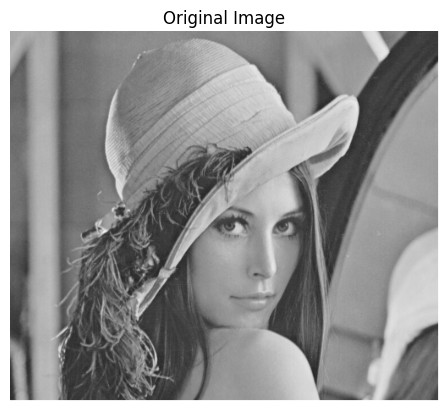

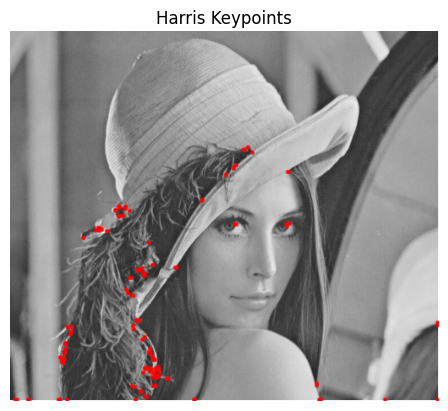

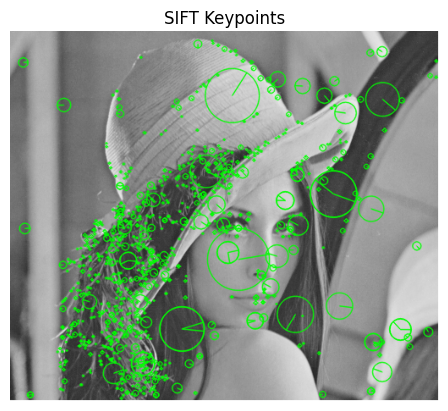

error: ignored

In [32]:
import cv2
import matplotlib.pyplot as plt

# Load the image
image = cv2.imread('abc.png', cv2.IMREAD_GRAYSCALE)

# Display the original image
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')
plt.show()

# Harris Corner Detection
# Apply Harris corner detection
dst = cv2.cornerHarris(image, blockSize=2, ksize=3, k=0.04)
dst = cv2.dilate(dst, None)

# Extract keypoints from the Harris corner response
keypoints_harris = []
for i in range(dst.shape[0]):
    for j in range(dst.shape[1]):
        if dst[i, j] > 0.01 * dst.max():
            keypoints_harris.append(cv2.KeyPoint(j, i, 1))

# Draw keypoints on the original image
image_harris = cv2.drawKeypoints(image, keypoints_harris, None, color=(0, 0, 255), flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

# Display the image with Harris keypoints
plt.imshow(cv2.cvtColor(image_harris, cv2.COLOR_BGR2RGB))
plt.title('Harris Keypoints')
plt.axis('off')
plt.show()

# SIFT Feature Extraction
# Create SIFT object
sift = cv2.xfeatures2d.SIFT_create()

# Detect keypoints and compute descriptors using SIFT
keypoints_sift, descriptors_sift = sift.detectAndCompute(image, None)

# Draw keypoints on the original image
image_sift = cv2.drawKeypoints(image, keypoints_sift, None, color=(0, 255, 0), flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

# Display the image with SIFT keypoints
plt.imshow(cv2.cvtColor(image_sift, cv2.COLOR_BGR2RGB))
plt.title('SIFT Keypoints')
plt.axis('off')
plt.show()

# SURF Feature Extraction
# Create SURF object
surf = cv2.xfeatures2d.SURF_create()

# Detect keypoints and compute descriptors using SURF
keypoints_surf, descriptors_surf = surf.detectAndCompute(image, None)

# Draw keypoints on the original image
image_surf = cv2.drawKeypoints(image, keypoints_surf, None, color=(255, 0, 0), flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

# Display the image with SURF keypoints
plt.imshow(cv2.cvtColor(image_surf, cv2.COLOR_BGR2RGB))
plt.title('SURF Keypoints')
plt.axis('off')
plt.show()
